In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

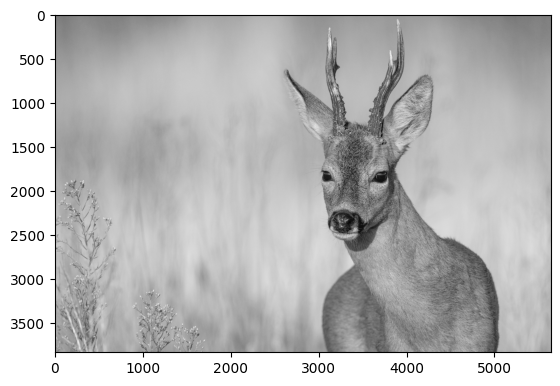

In [7]:
img = cv2.imread('../images/deer.jpg', 0)

plt.imshow(img, cmap='gray')
plt.show()

In [8]:
def butterworth_lowpass_filter(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.arange(rows).reshape(-1, 1) - crow
    v = np.arange(cols).reshape(1, -1) - ccol

    D = np.sqrt(u**2 + v**2)
    
    D0 = cutoff * min(rows, cols) / 2
    H = 1 / (1 + (D / D0)**(2 * order))
    
    return H

def butterworth_highpass_filter(shape, cutoff, order=2):
    H_low = butterworth_lowpass_filter(shape, cutoff, order)
    H_high = 1 - H_low
    
    return H_high

def apply_frequency_filter(image, filter_mask):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    filtered_shift = f_shift * filter_mask
    
    f_ishift = np.fft.ifftshift(filtered_shift)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.real(filtered_image)
    
    return filtered_image

Image shape: (3837, 5642)


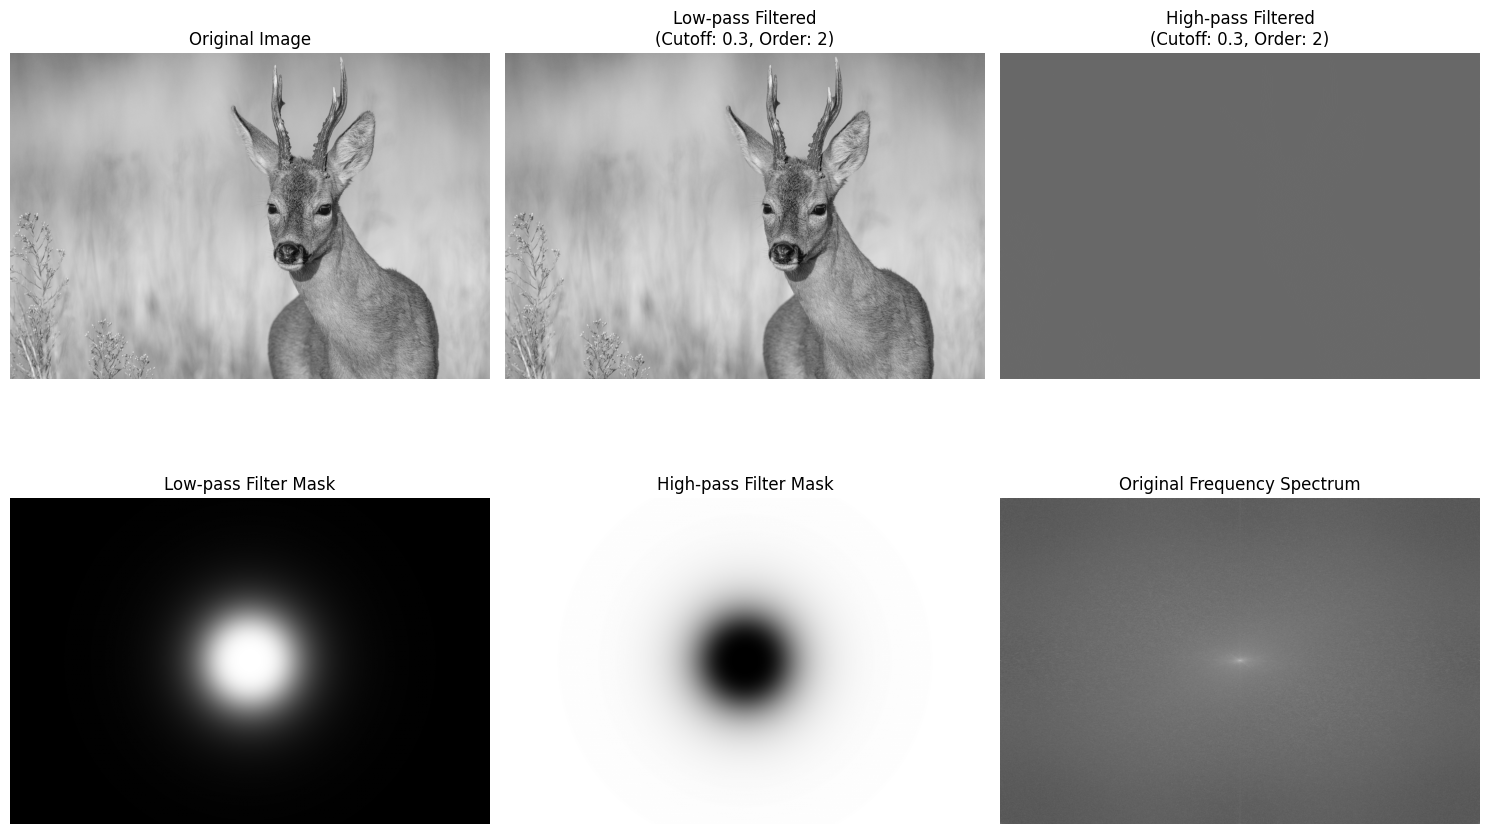

In [9]:
print(f"Image shape: {img.shape}")

cutoff_freq = 0.3
filter_order = 2

lowpass_filter = butterworth_lowpass_filter(img.shape, cutoff_freq, filter_order)
img_lowpass = apply_frequency_filter(img, lowpass_filter)

highpass_filter = butterworth_highpass_filter(img.shape, cutoff_freq, filter_order)
img_highpass = apply_frequency_filter(img, highpass_filter)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_lowpass, cmap='gray')
axes[0, 1].set_title(f'Low-pass Filtered\n(Cutoff: {cutoff_freq}, Order: {filter_order})')
axes[0, 1].axis('off')

axes[0, 2].imshow(img_highpass, cmap='gray')
axes[0, 2].set_title(f'High-pass Filtered\n(Cutoff: {cutoff_freq}, Order: {filter_order})')
axes[0, 2].axis('off')

axes[1, 0].imshow(lowpass_filter, cmap='gray')
axes[1, 0].set_title('Low-pass Filter Mask')
axes[1, 0].axis('off')

axes[1, 1].imshow(highpass_filter, cmap='gray')
axes[1, 1].set_title('High-pass Filter Mask')
axes[1, 1].axis('off')

f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_shift) + 1)
axes[1, 2].imshow(magnitude_spectrum, cmap='gray')
axes[1, 2].set_title('Original Frequency Spectrum')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

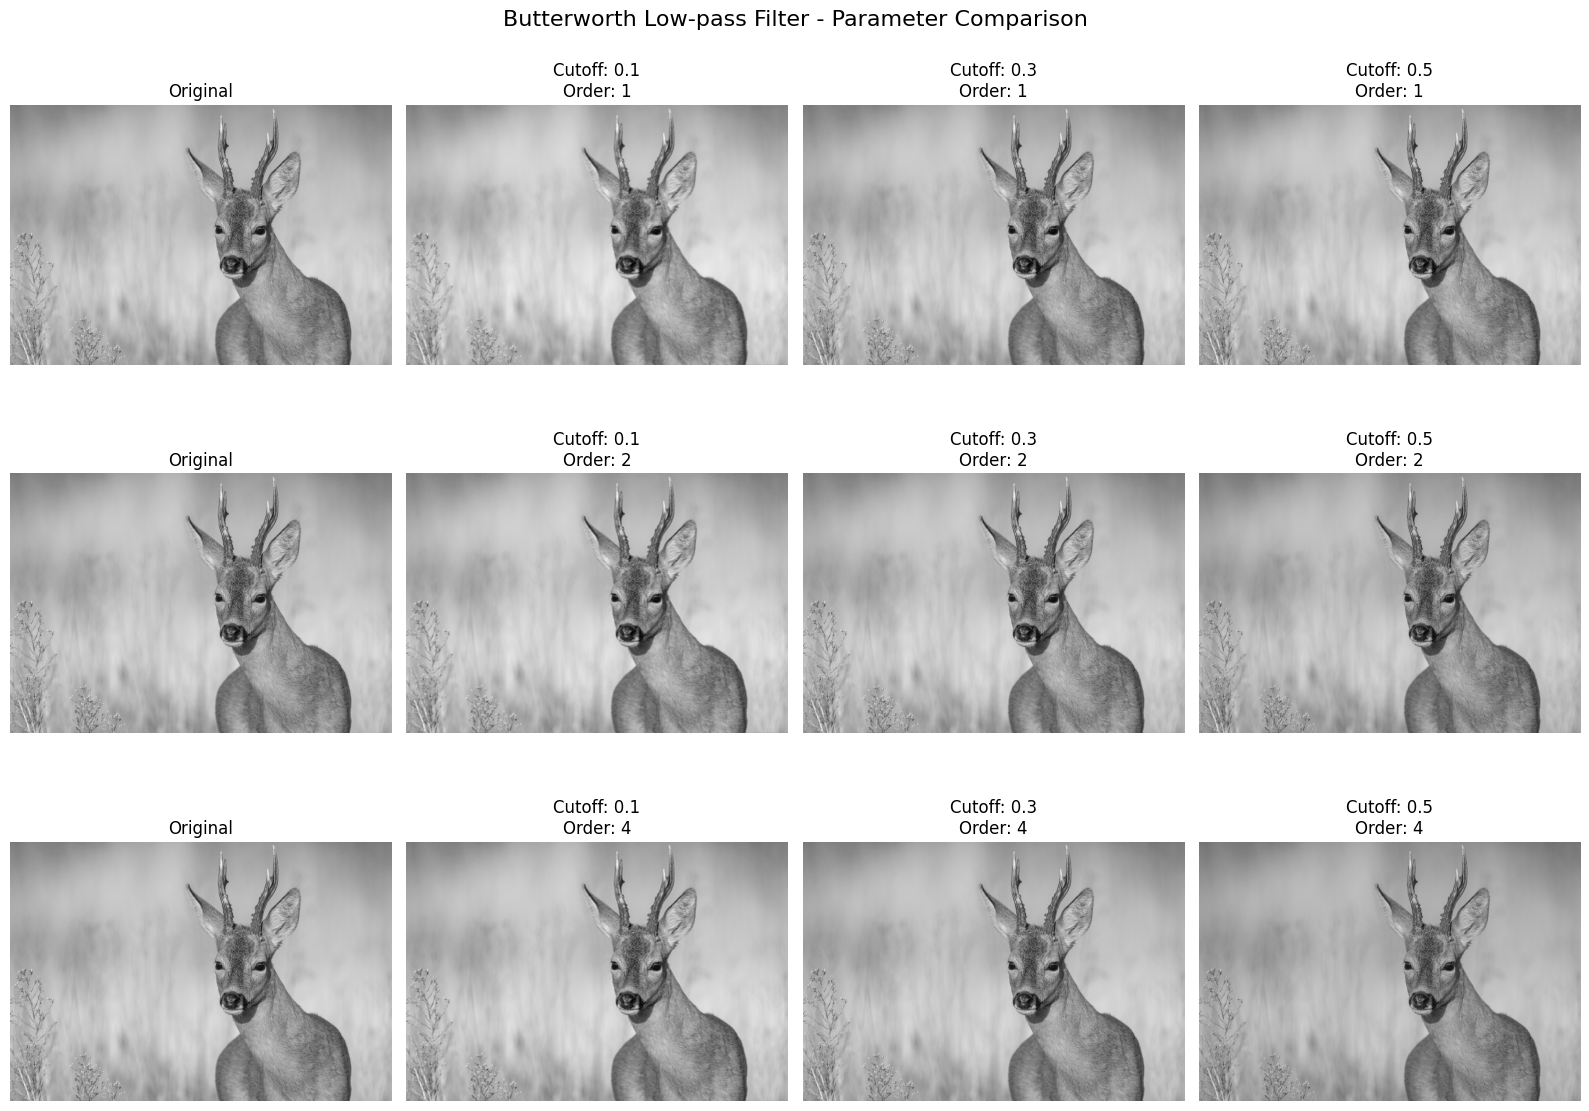

In [10]:
def compare_butterworth_parameters():
    cutoffs = [0.1, 0.3, 0.5]
    orders = [1, 2, 4]
    
    fig, axes = plt.subplots(len(orders), len(cutoffs) + 1, figsize=(16, 12))
    
    for i in range(len(orders)):
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')
    
    for i, order in enumerate(orders):
        for j, cutoff in enumerate(cutoffs):
            lpf = butterworth_lowpass_filter(img.shape, cutoff, order)
            filtered_img = apply_frequency_filter(img, lpf)
            
            axes[i, j+1].imshow(filtered_img, cmap='gray')
            axes[i, j+1].set_title(f'Cutoff: {cutoff}\nOrder: {order}')
            axes[i, j+1].axis('off')
    
    plt.suptitle('Butterworth Low-pass Filter - Parameter Comparison', fontsize=16)
    plt.tight_layout()
    plt.show()

compare_butterworth_parameters()